In [7]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date, datetime

In [5]:
ticker = "CSCO"
today = date.today()

csco_prices = yf.download(ticker, 
                   start='2020-01-01', 
                   end=today, 
                   progress=False, auto_adjust=True)

csco_prices.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,43.738123,44.065746,43.574309,44.065746,16708100
2020-01-03,43.601606,43.810922,43.210274,43.346786,15577400
2020-01-06,42.900855,43.519705,42.782544,43.501503,22183600
2020-01-07,43.428704,43.428704,42.864456,43.219387,16501900
2020-01-08,42.746145,43.492405,42.600534,43.246685,25175900


In [6]:
ticker = "TRV"
today = date.today()

trv_prices = yf.download(ticker, 
                   start='2020-01-01', 
                   end=today, 
                   progress=False, auto_adjust=True)

trv_prices.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,128.144047,128.349049,126.858129,128.134720,1117300
2020-01-03,127.240159,128.004245,127.053797,127.678116,927300
2020-01-06,126.867448,127.855190,126.392224,127.817909,952800
2020-01-07,126.625164,127.314717,125.889032,125.944939,1204600
2020-01-08,126.671740,128.311740,126.252424,127.296059,1942800


In [14]:
L = len(csco_prices["Close"])
trv_returns = np.zeros(L - 1)
csco_returns = np.zeros(L - 1)

for i in range(L - 1):
    trv_returns[i] = np.log(trv_prices["Close"][i + 1] / trv_prices["Close"][i]) * 100
    csco_returns[i] = np.log(csco_prices["Close"][i + 1] / csco_prices["Close"][i]) * 100

In [15]:
trv_mean = np.mean(trv_returns)
csco_mean = np.mean(csco_returns)

print(trv_mean)
print(csco_mean)

0.05159910035038647
0.011037807386675536


In [16]:
trv_std = np.std(trv_returns)
csco_std = np.std(csco_returns)

print(trv_std)
print(csco_std)

2.135407031921472
1.9843509954291867


In [17]:
mean = np.array([trv_mean, csco_mean])
std = np.array([trv_std, csco_std])

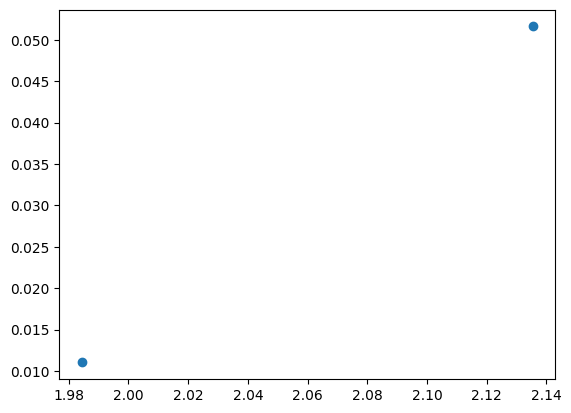

In [18]:
plt.scatter(std, mean)

In [22]:
# Weighted Returns 
N = 1000
w = np.linspace(0, 1, N)

optimal_mean = np.zeros(N)
optimal_std = np.zeros(N)

for i in range(N):
    
    weighted_returns = np.zeros(len(trv_returns))
    
    for j in range(len(trv_returns)):
        
        weighted_returns[j] = w[i] * trv_returns[j] + (1 - w[i]) * csco_returns[j]
        
    optimal_mean[i] = np.mean(weighted_returns)
    optimal_std[i] = np.std(weighted_returns)

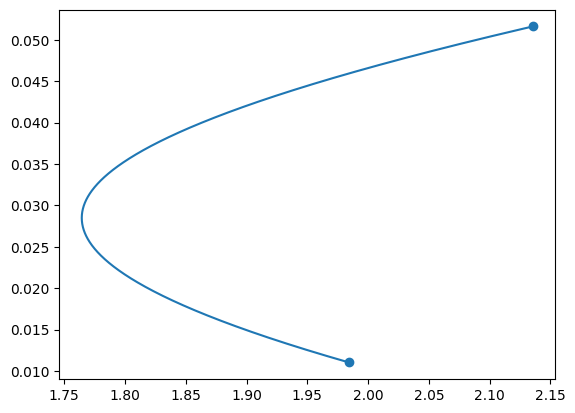

In [26]:
plt.plot(optimal_std, optimal_mean)
plt.scatter(std, mean)